# Unidad 1 – Fases 1 a 3 (CRISP-DM)

### Proyecto: Predicción de Deserción de Estudiantes

-Business Understanding → Data Understanding → Data Preparation
-  **Integrantes:** Orihuela Orozco Luis, Ponce Galarza Brayan


## Fase 1. Business Understanding

### 🎯 1. Objective

Diseñar y documentar un análisis de datos que ayude a detectar a tiempo el riesgo de deserción en estudiantes de la UPeU, para orientar acciones de apoyo académico y socioeconómico.

## Fase 2. Data Understanding

### 📥 2. Data collection 

In [1]:
import pandas as pd
import numpy as np

'''
df_p1 = pd.read_csv("in_data_cruda_p1_27072025.csv", 
                    encoding='utf-8',      # o 'latin-1' si hay caracteres especiales
                    sep=';',               # separador (por defecto es coma)
                    header=0,              # fila que contiene los nombres de columnas
                    index_col=None)        # si quieres usar una columna como índice
'''
df = pd.read_excel("upeu_students_data.xlsx")


In [2]:
# Eliminar columnas que no aportan
df = df.drop(columns=['ID', 'Nombres Completos'])
# Resumen general
df.info()
print('df.columns:',df.columns)
print('df.shape:',df.shape)
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Género                              3000 non-null   int64  
 1   Modo de solicitud                   3000 non-null   int64  
 2   Orden de solicitud                  3000 non-null   int64  
 3   Carrera                             3000 non-null   int64  
 4   Trasladado(a)                       3000 non-null   int64  
 5   Necesidades educativas especiales   3000 non-null   int64  
 6   Procedencia                         3000 non-null   int64  
 7   Vivienda                            3000 non-null   int64  
 8   Crianza Adventista                  3000 non-null   int64  
 9   Estado civil                        3000 non-null   int64  
 10  Titulación de la madre              3000 non-null   int64  
 11  Titulación del padre                3000 no

,Género,Modo de solicitud,Orden de solicitud,Carrera,Trasladado(a),Necesidades educativas especiales,Procedencia,Vivienda,Crianza Adventista,Estado civil,...,Becario,Edad,Unidades curriculares matriculadas,Unidades curriculares evaluadas,Unidades curriculares aprobadas,Desarrollo de Tareas,Asistencia,Promedio ponderado del semestre,Situación laboral,Condición Final
0,1,4,3,29,1,0,2,1,0,1,...,0,24,8,7,5,41,79,10.58,0,1
1,0,3,3,29,1,1,1,3,1,1,...,0,37,7,6,4,45,84,10.16,1,2
2,1,3,1,8,0,1,1,2,1,1,...,1,28,4,4,0,96,70,12.26,1,1
3,1,4,1,11,1,0,2,2,0,1,...,0,25,7,7,4,65,81,16.48,0,1
4,0,2,3,14,0,0,2,1,1,1,...,0,31,4,3,0,69,96,12.89,0,2
5,1,5,1,8,1,0,2,2,1,1,...,0,18,4,3,2,43,83,10.06,0,2
6,0,1,1,14,1,0,1,1,0,1,...,0,20,5,4,1,57,55,10.17,1,1
7,1,3,2,24,0,0,2,1,1,1,...,0,17,5,5,5,83,68,13.06,0,2
8,0,4,1,24,1,0,2,1,1,1,...,0,32,3,3,2,53,62,11.22,1,1
9,1,1,3,20,1,0,2,1,0,1,...,0,23,5,4,3,50,83,10.20,0,2


### 📊 3. Descriptive analysis

#### 3.1 Análisis descriptivo

In [3]:
#Resumen estadístico de todas las variables (describe()).
df.describe(include="all").T # incluye categóricas y numéricas

,count,mean,std,min,25%,50%,75%,max
Género,3000.0,0.485000,0.499858,0.00,0.00,0.000,1.00,1.0
Modo de solicitud,3000.0,3.520333,1.729909,1.00,2.00,4.000,5.00,6.0
Orden de solicitud,3000.0,1.993667,0.827358,1.00,1.00,2.000,3.00,3.0
Carrera,3000.0,15.753000,8.801580,1.00,8.00,16.000,23.00,31.0
Trasladado(a),3000.0,0.493333,0.500039,0.00,0.00,0.000,1.00,1.0
Necesidades educativas especiales,3000.0,0.054667,0.227366,0.00,0.00,0.000,0.00,1.0
Procedencia,3000.0,1.650333,0.571701,1.00,1.00,2.000,2.00,3.0
Vivienda,3000.0,2.013333,0.813660,1.00,1.00,2.000,3.00,3.0
Crianza Adventista,3000.0,0.491667,0.500014,0.00,0.00,0.000,1.00,1.0
Estado civil,3000.0,1.103333,0.304444,1.00,1.00,1.000,1.00,2.0


In [4]:
# Separar los datos segú sus Tipos de variables (numéricas, categóricas). fechas se considera como cat aunque también puedes separr
numeric_data = df.select_dtypes(include=[np.number])
categor_data = df.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],categor_data.shape[1]))

There are 28 numeric and 0 categorical columns in train data


In [5]:
numeric_data.describe().T
# Puedes ver la Distribución de variables numéricas (cantidad o freq, media, mediana, desviación estándar, mín, máx. etc.).

,count,mean,std,min,25%,50%,75%,max
Género,3000.0,0.485000,0.499858,0.00,0.00,0.000,1.00,1.0
Modo de solicitud,3000.0,3.520333,1.729909,1.00,2.00,4.000,5.00,6.0
Orden de solicitud,3000.0,1.993667,0.827358,1.00,1.00,2.000,3.00,3.0
Carrera,3000.0,15.753000,8.801580,1.00,8.00,16.000,23.00,31.0
Trasladado(a),3000.0,0.493333,0.500039,0.00,0.00,0.000,1.00,1.0
Necesidades educativas especiales,3000.0,0.054667,0.227366,0.00,0.00,0.000,0.00,1.0
Procedencia,3000.0,1.650333,0.571701,1.00,1.00,2.000,2.00,3.0
Vivienda,3000.0,2.013333,0.813660,1.00,1.00,2.000,3.00,3.0
Crianza Adventista,3000.0,0.491667,0.500014,0.00,0.00,0.000,1.00,1.0
Estado civil,3000.0,1.103333,0.304444,1.00,1.00,1.000,1.00,2.0


In [6]:
#categor_data.describe(include="all").T
# Puedes ver valores únicos en categóricas (ej. State, Vehicle type, Fuel type), freq, etc.

In [7]:
# Columnas categóricas a explorar
categorical_cols = [
    'Género','Modo de solicitud','Orden de solicitud','Carrera',
    'Trasladado(a)','Necesidades educativas especiales','Procedencia',
    'Vivienda','Crianza Adventista','Estado civil','Titulación de la madre',
    'Titulación del padre','Ocupación de la madre','Ocupación del padre',
    'Formas de Pago','Deudor','Matrícula al día','Becario','Situación laboral'
]

# Conteo de valores únicos en categóricas
for col in categorical_cols:
    print(f"\n{col}:\n", df[col].value_counts())

# Conteo de la variable objetivo
print("\nCondición Final:\n", df["Condición Final"].value_counts())


Género:
 Género
0    1545
1    1455
Name: count, dtype: int64

Modo de solicitud:
 Modo de solicitud
6    532
2    521
5    505
1    497
3    475
4    470
Name: count, dtype: int64

Orden de solicitud:
 Orden de solicitud
1    1036
3    1017
2     947
Name: count, dtype: int64

Carrera:
 Carrera
7     114
24    113
20    112
14    111
9     107
16    106
15    106
8     103
11    103
2     102
10    101
12    101
19    100
21     98
29     97
3      97
22     93
28     93
1      93
18     92
30     91
6      90
13     90
4      89
5      89
26     86
23     86
17     86
25     84
31     84
27     83
Name: count, dtype: int64

Trasladado(a):
 Trasladado(a)
0    1520
1    1480
Name: count, dtype: int64

Necesidades educativas especiales:
 Necesidades educativas especiales
0    2836
1     164
Name: count, dtype: int64

Procedencia:
 Procedencia
2    1653
1    1198
3     149
Name: count, dtype: int64

Vivienda:
 Vivienda
2    1014
3    1013
1     973
Name: count, dtype: int64

Crianza Adv

#### 3.2 Análisis descriptivo (gráficos)

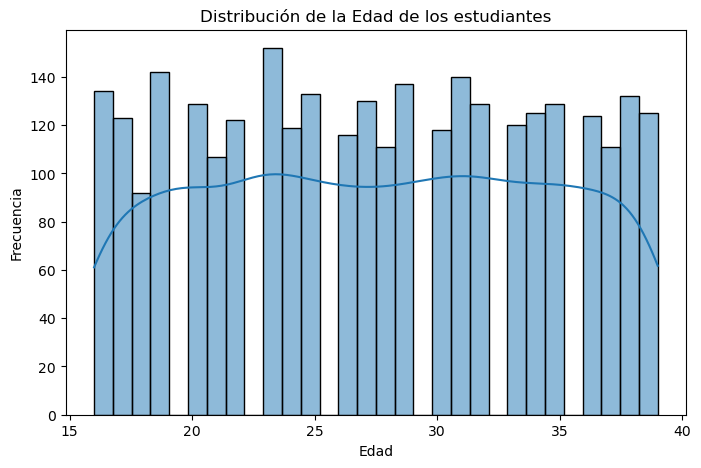

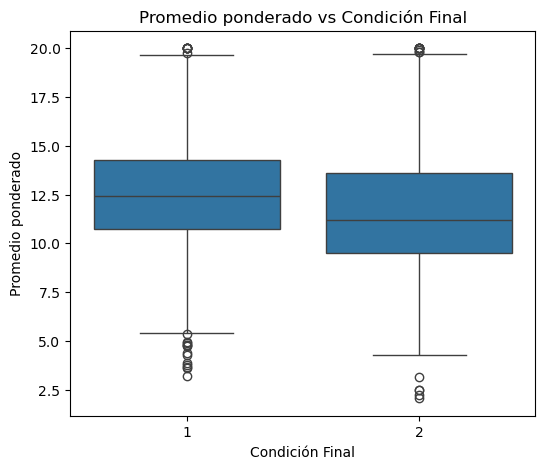

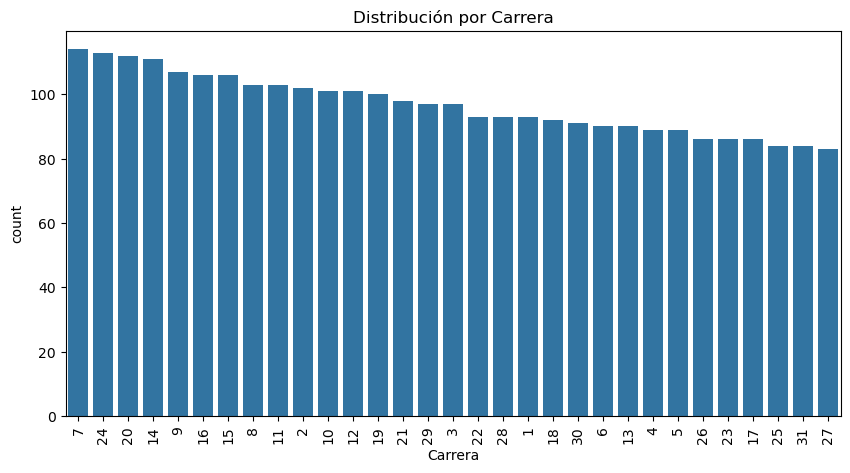

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de Edad de los estudiantes
plt.figure(figsize=(8,5))
sns.histplot(df['Edad'], bins=30, kde=True)
plt.title("Distribución de la Edad de los estudiantes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot de promedio ponderado por Condición Final
plt.figure(figsize=(6,5))
sns.boxplot(x='Condición Final', y='Promedio ponderado del semestre', data=df)
plt.title("Promedio ponderado vs Condición Final")
plt.xlabel("Condición Final")
plt.ylabel("Promedio ponderado")
plt.show()

# Conteo de carreras
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Carrera', order=df['Carrera'].value_counts().index)
plt.title("Distribución por Carrera")
plt.xticks(rotation=90)
plt.show()


#### 3.3 Análisis exploratorio (con estadísticas): Correlaciones y cruces de variables

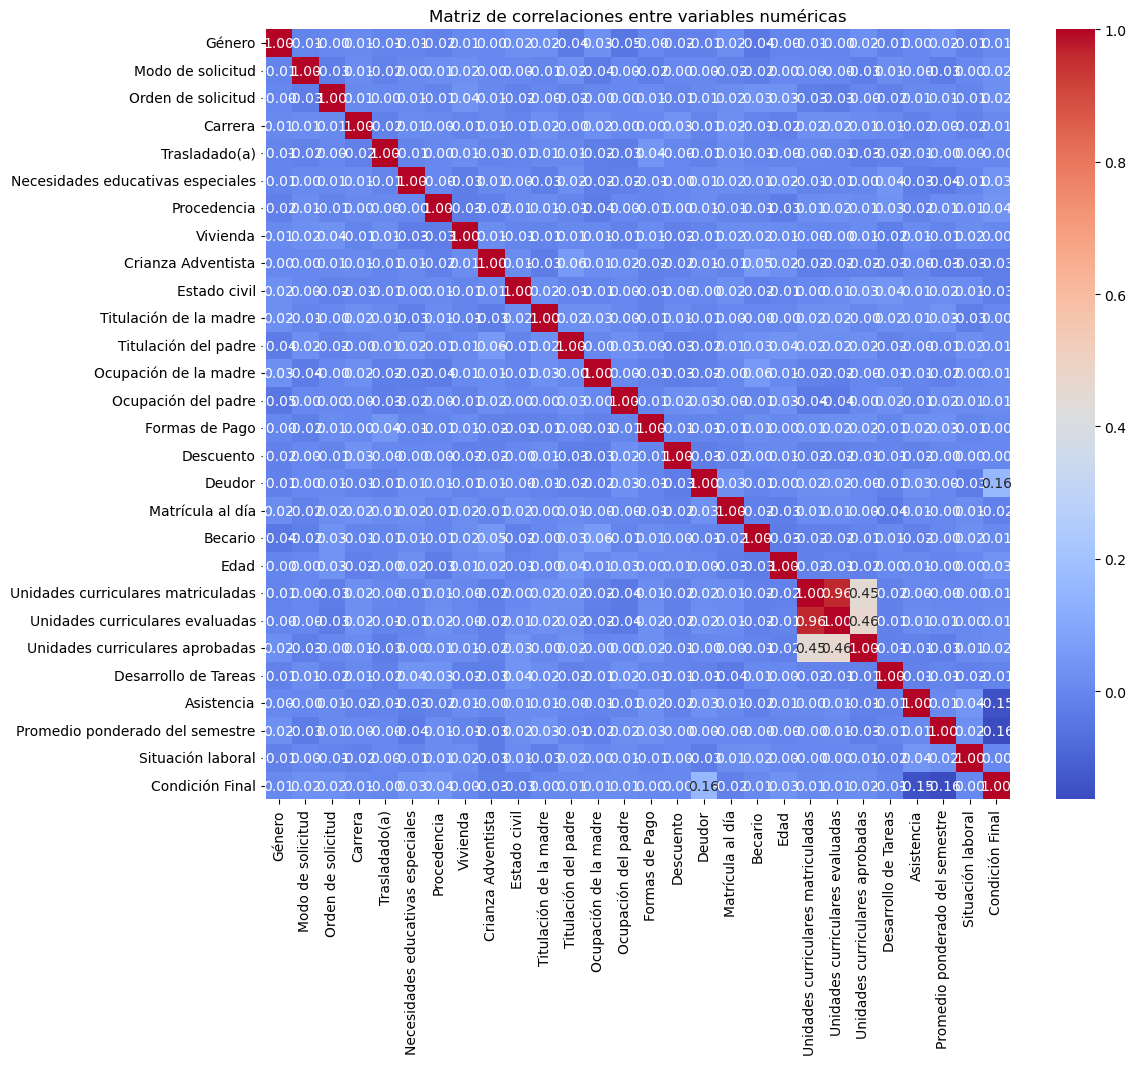


Distribución porcentual de Condición Final por Género:

Condición Final          1          2
Género                               
0                53.721683  46.278317
1                52.852234  47.147766

Distribución porcentual de Condición Final por Situación laboral:

Condición Final            1          2
Situación laboral                      
0                  53.727945  46.272055
1                  51.677852  48.322148
2                  54.216867  45.783133

Distribución porcentual de Condición Final por Carrera:

Condición Final          1          2
Carrera                              
1                60.215054  39.784946
2                51.960784  48.039216
3                58.762887  41.237113
4                58.426966  41.573034
5                47.191011  52.808989


In [9]:
# 1. Correlaciones numéricas (rendimiento académico, edad, asistencia, etc.)
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlaciones entre variables numéricas")
plt.show()

# 2. Cruce de variables categóricas con la variable objetivo (Condición Final)
# Ejemplo: Género vs Condición Final
cruce_genero = pd.crosstab(df['Género'], df['Condición Final'], normalize='index') * 100
print("\nDistribución porcentual de Condición Final por Género:\n")
print(cruce_genero)

# Otro ejemplo: Situación laboral vs Condición Final
cruce_trabajo = pd.crosstab(df['Situación laboral'], df['Condición Final'], normalize='index') * 100
print("\nDistribución porcentual de Condición Final por Situación laboral:\n")
print(cruce_trabajo)

# Otro ejemplo: Carrera vs Condición Final (puede ser más grande)
cruce_carrera = pd.crosstab(df['Carrera'], df['Condición Final'], normalize='index') * 100
print("\nDistribución porcentual de Condición Final por Carrera:\n")
print(cruce_carrera.head())  # solo mostramos las primeras filas para no saturar


#### 3.4 Diagnóstico de calidad inicial 


Valores faltantes por columna:

Género                                0
Modo de solicitud                     0
Orden de solicitud                    0
Carrera                               0
Trasladado(a)                         0
Necesidades educativas especiales     0
Procedencia                           0
Vivienda                              0
Crianza Adventista                    0
Estado civil                          0
Titulación de la madre                0
Titulación del padre                  0
Ocupación de la madre                 0
Ocupación del padre                   0
Formas de Pago                        0
Descuento                             0
Deudor                                0
Matrícula al día                      0
Becario                               0
Edad                                  0
Unidades curriculares matriculadas    0
Unidades curriculares evaluadas       0
Unidades curriculares aprobadas       0
Desarrollo de Tareas                  0
Asisten

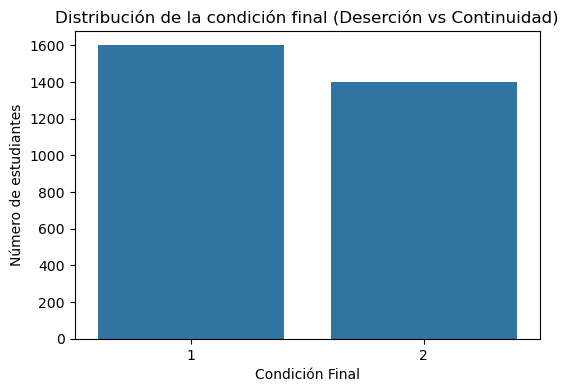

In [10]:
# --- 1. Valores faltantes ---
print("\nValores faltantes por columna:\n")
print(df.isnull().sum())

# --- 2. Posibles inconsistencias ---
# Edad
print("\nEdad mínima y máxima:")
print("Mínimo:", df['Edad'].min())
print("Máximo:", df['Edad'].max())

# Promedio ponderado
print("\nPromedio ponderado mínimo y máximo:")
print("Mínimo:", df['Promedio ponderado del semestre'].min())
print("Máximo:", df['Promedio ponderado del semestre'].max())

# Nota: aquí puedes revisar si hay edades imposibles (ej. 5 años o 90 años) o promedios fuera de rango (ej. >20 en escala peruana).

# --- 3. Distribución de la variable objetivo ---
plt.figure(figsize=(6,4))
sns.countplot(x='Condición Final', data=df, order=df['Condición Final'].value_counts().index)
plt.title("Distribución de la condición final (Deserción vs Continuidad)")
plt.xlabel("Condición Final")
plt.ylabel("Número de estudiantes")
plt.show()



In [11]:
# --- 1. Valores faltantes ---
na_counts = df.isna().sum().sort_values(ascending=False)
na_pct = (na_counts/len(df)*100).round(2)
quality_missing = pd.DataFrame({'missing': na_counts, 'missing_%': na_pct})
display(quality_missing)

# --- 2. Duplicados ---
# Usamos ID de estudiante + Carrera + Año/Semestre (si lo tienes en tu data)
# Si no tienes fecha, dejamos solo ID
if 'ID' in df.columns:
    dup_keys = df.duplicated(subset=['ID','Carrera'], keep=False)
    print('Registros potencialmente duplicados:', dup_keys.sum())
else:
    dup_keys = df.duplicated()
    print('Registros potencialmente duplicados:', dup_keys.sum())

# --- 3. Registros sospechosos ---
# Definimos reglas simples para detectar datos poco realistas
suspects = df[
    (df['Edad'] < 15) | (df['Edad'] > 70) |   # Edades sospechosas
    (df['Promedio ponderado del semestre'] < 0) | 
    (df['Promedio ponderado del semestre'] > 20)  # Notas fuera del rango
]

print("Registros sospechosos detectados:", len(suspects))
if len(suspects) > 0:
    display(suspects[['ID','Edad','Carrera','Promedio ponderado del semestre','Condición Final']].head())


,missing,missing_%
Género,0,0.0
Modo de solicitud,0,0.0
Situación laboral,0,0.0
Promedio ponderado del semestre,0,0.0
Asistencia,0,0.0
Desarrollo de Tareas,0,0.0
Unidades curriculares aprobadas,0,0.0
Unidades curriculares evaluadas,0,0.0
Unidades curriculares matriculadas,0,0.0
Edad,0,0.0


Registros potencialmente duplicados: 0
Registros sospechosos detectados: 0


#### 3.5 Perfil estadístico comparativo (Aprobados vs Desaprobados)

In [12]:
# Medias comparativas de variables numéricas según la Condición Final
medias_comparativas = df.groupby('Condición Final').mean(numeric_only=True)
display(medias_comparativas)

,Género,Modo de solicitud,Orden de solicitud,Carrera,Trasladado(a),Necesidades educativas especiales,Procedencia,Vivienda,Crianza Adventista,Estado civil,...,Matrícula al día,Becario,Edad,Unidades curriculares matriculadas,Unidades curriculares evaluadas,Unidades curriculares aprobadas,Desarrollo de Tareas,Asistencia,Promedio ponderado del semestre,Situación laboral
Condición Final,,,,,,,,,,,,,,,,,,,,,
1,0.480926,3.481551,1.975610,15.687305,0.494684,0.048780,1.630394,2.010632,0.504065,1.110694,...,0.820513,0.150094,27.307067,5.530957,5.008755,2.454659,70.645403,72.165729,12.418774,0.578487
2,0.489650,3.564597,2.014276,15.827980,0.491792,0.061385,1.673091,2.016417,0.477516,1.094932,...,0.803712,0.154176,27.776588,5.556031,5.042827,2.525339,70.285510,67.000714,11.449044,0.582441


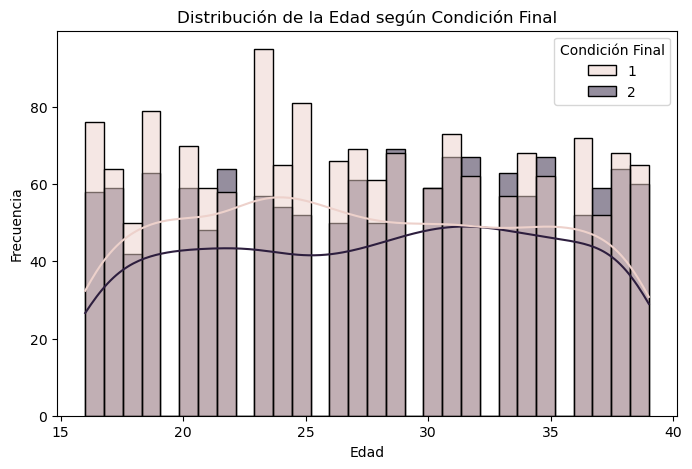

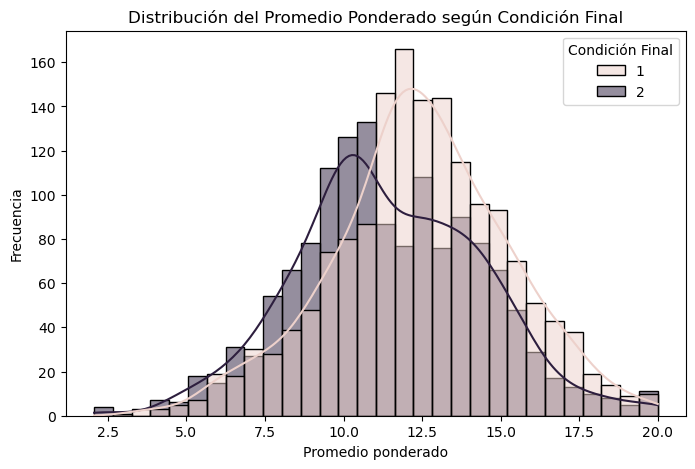

In [13]:
# 1. Distribución de la Edad según Condición Final
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Edad', hue='Condición Final', kde=True, bins=30)
plt.title("Distribución de la Edad según Condición Final")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# 2. Distribución del Promedio ponderado según Condición Final
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Promedio ponderado del semestre', hue='Condición Final', kde=True, bins=30)
plt.title("Distribución del Promedio Ponderado según Condición Final")
plt.xlabel("Promedio ponderado")
plt.ylabel("Frecuencia")
plt.show()

In [14]:
# Perfil numérico: estadísticas por Condición Final
perfil_num = df.groupby('Condición Final')[['Edad','Promedio ponderado del semestre']]
perfil_num = perfil_num.agg(['mean','median','std','min','max']).round(3)
display(perfil_num)

# Perfil categórico: distribución porcentual según Condición Final
perfil_cat_genero = pd.crosstab(df['Género'], df['Condición Final'], normalize='columns')*100
perfil_cat_trabajo = pd.crosstab(df['Situación laboral'], df['Condición Final'], normalize='columns')*100
perfil_cat_carrera = pd.crosstab(df['Carrera'], df['Condición Final'], normalize='columns')*100

display(perfil_cat_genero.round(2))
display(perfil_cat_trabajo.round(2))
display(perfil_cat_carrera.round(2).head())  # solo primeras filas si son muchas carreras

# Exportar perfiles a CSV
perfil_num.to_csv('perfil_numerico_por_condicion.csv')
perfil_cat_genero.to_csv('perfil_genero_por_condicion.csv')
perfil_cat_trabajo.to_csv('perfil_trabajo_por_condicion.csv')
perfil_cat_carrera.to_csv('perfil_carrera_por_condicion.csv')

print('Archivos CSV exportados.')

Edad                       Promedio ponderado del semestre  \
                   mean median    std min max                            mean   
Condición Final                                                                 
1                27.307   27.0  6.878  16  39                          12.419   
2                27.777   28.0  6.909  16  39                          11.449   

                                           
                median    std   min   max  
Condición Final                            
1                12.40  2.863  3.20  20.0  
2                11.19  2.984  2.06  20.0

Condición Final,1,2
Género,,
0,51.91,51.03
1,48.09,48.97


Condición Final,1,2
Situación laboral,,
0,59.04,58.03
1,24.08,25.70
2,16.89,16.27


Condición Final,1,2
Carrera,,
1,3.50,2.64
2,3.31,3.50
3,3.56,2.86
4,3.25,2.64
5,2.63,3.35


Archivos CSV exportados.


### 3.6 Hallazgos

#### Hallazgos del Paso 3: Descriptive analysis

- Registros: **3.000** estudiantes.  
- Variables totales: **30** columnas (incluye identificadores, predictores y variable objetivo).  
- Variable objetivo: **`Condición Final`** (codificada: **1 = Graduado**, **2 = Desertó**).  
  - Distribución en el dataset: **≈ 53.3% = 1 (Graduado)** vs **≈ 46.7% = 2 (Desertó)**.  
  - Interpretación: la proporción entre graduados y desertores está relativamente balanceada, lo que facilita el entrenamiento sin necesidad inmediata de técnicas pesadas de remuestreo.

---

## A. Sobre las variables (tipos y codificaciones)
**Variables categóricas (codificadas numéricamente o binarias)**  
- `Género` (0 = Hombre, 1 = Mujer)  
- `Modo de solicitud` (1–6; vías de ingreso: examen ordinario, traslado externo/interno, convenio/beca, ingreso directo, reingreso)  
- `Orden de solicitud` (1 = 1.ª opción, 2 = 2.ª, 3 = 3.ª)  
- `Carrera` (1–31; ver tabla abajo con mapeo)  
- `Trasladado(a)` (0 = No, 1 = Sí)  
- `Necesidades educativas especiales` (0 = No, 1 = Sí)  
- `Procedencia` (1 = Lima, 2 = Provincia, 3 = Extranjero)  
- `Vivienda` (1 = Residencia, 2 = Familiares, 3 = Alquila cuarto)  
- `Crianza Adventista` (0 = No, 1 = Sí)  
- `Estado civil` (1 = Soltero, 2 = Casado)  
- `Titulación de la madre` / `Titulación del padre` (1–5: Sin estudios → Educación superior) — orden ordinal.  
- `Ocupación de la madre` / `Ocupación del padre` (1–10; ver tabla abajo)  
- `Formas de Pago` (1 = Armadas, 2 = Contado, 3 = Otros)  
- `Descuento` (0–5; ver tabla abajo)  
- `Deudor` (0 = No, 1 = Sí)  
- `Matrícula al día` (0 = No, 1 = Sí)  
- `Becario` (0 = No, 1 = Sí)  
- `Situación laboral` (0 = No trabaja, 1 = Medio tiempo, 2 = Tiempo completo)

**Variables numéricas**
- `Edad` (años, entero).  
- `Unidades curriculares 1.º sem (matriculadas/evaluadas/aprobadas)` (enteros).  
- `Desarrollo de Tareas` (porcentaje).  
- `Asistencia` (porcentaje).  
- `Promedio ponderado del semestre` (nota, rango esperado 0–20).

**Identificador (no predictivo)**
- `ID` y `Nombres Completos` — no se usarán en el modelo (solo trazabilidad).

---

## B. Tablas de referencia (mapeos)
**Carrera (mapeo resumido)** — algunos ejemplos:
| Código | Carrera |
| --- | --- |
| 1 | Administración |
| 2 | Contabilidad, Gestión Tributaria y Aduanera |
| 3 | Marketing y Negocios Internacionales |
| ... | ... |
| 23 | Ingeniería en Ciencia de Datos |
| 28 | Medicina Humana |
| 31 | Teología |

**Ocupación (padre/madre)**
| Código | Categoría ocupacional |
| --- | --- |
| 1 | Profesionales y técnicos |
| 2 | Empleados administrativos / oficina |
| 3 | Comerciantes / vendedores |
| 4 | Obreros / trabajadores manuales |
| 5 | Agricultores / ganaderos / pescadores |
| 6 | Militares / policías / fuerzas del orden |
| 7 | Servicios personales y domésticos |
| 8 | Ama de casa |
| 9 | Desempleado / sin ocupación |
| 10 | Otros / no especificado |

**Descuento**
| Código | Tipo de descuento |
| --- | --- |
| 0 | No tiene descuento |
| 1 | Descuento por procedencia de colegio adventista |
| 2 | Descuento por hermanos en UPeU |
| 3 | Descuento por convenio institucional/iglesia |
| 4 | Descuento académico |
| 5 | Otro descuento |

*(Nota: incluir en el anexo la tabla completa de `Carrera` si se necesita reproducibilidad.)*

---

## C. Hallazgos principales (resumen ejecutivo)

### 1. Señales académicas
- **Promedio ponderado**: los graduados muestran **promedios más altos** en promedio que los desertores. La diferencia de medias es clara y consistente con cuadros univariados (histogramas / boxplots).  
- **Asistencia y Desarrollo de Tareas**: los estudiantes que permanecen tienden a tener **mayor asistencia** y cumplimiento de tareas; estas variables son señales útiles y complementarias al promedio.  
- **Unidades aprobadas / evaluadas**: aportan información sobre carga y desempeño; su combinación con promedio y asistencia mejora la discriminación de riesgo.

**Implicación:** el eje _rendimiento académico_ (promedio + asistencia + unidades aprobadas) es el predictor más robusto univariado de deserción.

### 2. Señales económicas / de permanencia
- **Deudor** y **Matrícula al día**: ser deudor se asocia a una mayor probabilidad de deserción; los desertores presentan una proporción mayor de deudores respecto a graduados.  
- **Formas de Pago** y **Descuento**: permiten identificar grupos con fragilidad financiera (p.ej. pagos a plazos o ausencia de beca/descuento relevante).

**Implicación:** el eje _riesgo financiero_ es un segundo factor clave para priorizar intervenciones (alertas tempranas, planes de pago, becas).

### 3. Demográficos y contexto
- **Edad**: ligeras diferencias (los desertores pueden ser marginalmente mayores en promedio), probablemente por mayor carga laboral.  
- **Situación laboral**: estudiantes que trabajan tiempo completo presentan mayor riesgo de deserción, por conflicto tiempo-estudio.  
- **Necesidades educativas especiales (NEE)**: grupo pequeño, con riesgo aumentado de deserción — requiere atención diferenciada.

### 4. Programa / admisión
- **Carrera**: heterogeneidad en tasas de deserción entre carreras; algunas muestran tasas sustancialmente por encima del promedio.  
- **Orden de solicitud / Modo de ingreso**: la 1.ª opción y ciertos modos de ingreso (p.ej. ingreso ordinario) muestran menor deserción que traslados o reingresos.

**Implicación:** incorporar efectos por carrera o segmentar modelos por grupos de carreras puede mejorar precisión.

### 5. Calidad de los datos (observaciones)
- En tu ejecución previa detectaste **pocos o nulos valores faltantes** y **sin duplicados por `ID`**, lo que es positivo para modelado.  
- Los rangos de `Edad` y `Promedio` son plausibles (ej.: edad entre ~16–39; promedio 0–20).  
- Muchas variables están codificadas numéricamente (aunque conceptualmente categóricas): conviene convertir las que son nominales a tipo `category`.

---

## D. Variables candidatas finales (sugeridas para X e y)
**Objetivo**
- `y = Condición Final` (1 = Graduado, 2 = Desertó)

**Predictoras (X) recomendadas**
- Académicas: `Promedio ponderado del semestre`, `Asistencia`, `Desarrollo de Tareas`, `Unidades curriculares (matriculadas/evaluadas/aprobadas)`  
- Financieras: `Deudor`, `Matrícula al día`, `Formas de Pago`, `Descuento`, `Becario`  
- Contexto / programa: `Carrera`, `Modo de solicitud`, `Orden de solicitud`, `Trasladado(a)`  
- Personales: `Edad`, `Género`, `Situación laboral`, `Necesidades educativas especiales`, `Vivienda`, `Procedencia`  
- Familiares: `Titulación de la madre`, `Titulación del padre`, `Ocupación de la madre`, `Ocupación del padre`

**Excluir**: `ID`, `Nombres Completos` (metadatos).

---

## E. Recomendaciones de preprocesamiento (Data Preparation)
1. **Tipar variables correctamente**
   - Convertir nominales codificadas (Carrera, Modo de solicitud, Procedencia, Vivienda, Formas de Pago, Descuento, Ocupaciones) a `category`.  
   - Mantener nivel ordinal para títulos de padres (1→5), si usar modelos que aprovechen orden; alternativamente one-hot.

2. **Imputación y limpieza**
   - Revisar columnas con NA (si aparecen), imputar según contexto: categorías con label "Unknown" o imputación por moda; numéricas con medianas.  
   - Tratar outliers plausibles (ej. edad fuera de rango o promedios fuera de 0–20).

3. **Codificación**
   - Para categorías de baja cardinalidad (Género, Deudor, Matrícula al día, Becario): usar integer encoding o leave as category.  
   - Para `Carrera` (alta cardinalidad): considerar **target encoding** o **one-hot** si no hay muchas categorías; alternativa: agrupar carreras poco frecuentes en "Otros".  
   - Para ocupaciones (padre/madre): agrupar categorías similares si hay poca representación.

4. **Escalado**
   - Escalar numéricas (Promedio, Edad, Asistencia, Desarrollo) si el modelo lo requiere (SVM, redes, regresión). No obligatorio para árboles.

5. **Balanceo / objetivos**
   - Como el target está ~53/47, no es imprescindible re-muestrear; sin embargo, si la métrica prioritaria es **recall de desertores** (capturar el mayor número posible de desertores), evaluar `class_weight` o ligeros oversampling en validación.

6. **Feature engineering**
   - `academic_risk_flag`: combinación binaria (Promedio < umbral AND Asistencia < umbral).  
   - `financial_risk_flag`: Deudor = 1 y Matrícula no al día = 1 → riesgo financiero.  
   - `workload_proxy`: unidades matriculadas + situación laboral (tiempo completo → mayor carga).  
   - Interacciones: `Promedio * Situación laboral`, `Carrera * Promedio`.

---

## F. Métricas y estrategias de evaluación sugeridas
- Métricas: **Recall (sensitivity)** para la clase `Desertó`, **Precision**, **F1-score**, curva ROC-AUC.  
- Validación: **k-fold estratificado** (mantener proporción de clases).  
- Interpretabilidad: usar modelos explicables (Random Forest + SHAP, regresión logística con regularización) para derivar reglas de intervención.

---

## G. Acciones operativas recomendadas (para el negocio)
1. **Sistema de alertas tempranas**: combinar `academic_risk_flag` + `financial_risk_flag` para priorizar llamados/asesorías y asignación de becas/planes de pago.  
2. **Segmentación por carrera**: enfocar programas de retención en carreras con mayor tasa de deserción.  
3. **Atención a NEE**: crear rutas de acompañamiento académico para estudiantes con necesidades educativas especiales.

---

### Conclusión
El análisis exploratorio muestra que **el rendimiento académico (promedio y asistencia)** y **la situación financiera (deuda, matrícula)** son los ejes más informativos para predecir deserción. Variables de admisión y carrera actúan como moderadores y ayudan a segmentar las intervenciones. La calidad de datos es adecuada para avanzar a la fase de preparación y modelado tras tipar correctamente las variables categóricas y ejecutar las transformaciones recomendadas.

## Fase 3. Data Preparation

### 🧹 4. Data cleaning

#### 4.1 Selección inicial de variables claves

Queremos construir un modelo que pueda predecir la deserción de estudiantes dentro de la Universidad Peruana Unión. Para ello tendremos en cuenta la variable Condición Final (Categoria: 1 = Graduado, 2 = Desertó).


##### a) Candidatas a **ELIMINAR** (irrelevantes o con riesgo de *leakage*)
- **Metadatos / administrativos**:  
  `Nombres Completos`

> *Motivo:* No aportan al objetivo de predecir y pueden introducir *data leakage*.

##### b) Candidatas a **CONSERVAR** (predictores)
Sociodemográficos
- `Género`  
- `Edad`  
- `Estado civil`  
- `Procedencia`
- `Vivienda`  
- `Crianza Adventista`

Familiares y educativos
- `Titulación de la madre`  
- `Titulación del padre`  
- `Ocupación de la madre`  
- `Ocupación del padre`

Académicos de ingreso
- `Modo de solicitud`  
- `Orden de solicitud`  
- `Carrera`  
- `Trasladado(a)`
- `Necesidades educativas especiales`

Académicos de desempeño
- `Unidades curriculares 1.º semestre (matriculadas)`  
- `Unidades curriculares 1.º semestre (evaluadas)`  
- `Unidades curriculares 1.º semestre (aprobadas)`  
- `Desarrollo de Tareas`
- `Asistencia`
- `Promedio ponderado del semestre`

Económicos
- `Formas de Pago`  
- `Descuento`  
- `Deudor`  
- `Matrícula al día`
- `Becario`
- `Situación laboral`

**Variable objetivo:** `Condicion Final` (1 = Graduado, 2 = Desertó)

---



In [15]:
# Variables a conservar como predictores
features_keep = [
    # Sociodemográficos
    "Género", "Edad", "Estado civil", "Procedencia", "Vivienda", "Crianza Adventista",
    
    # Familiares / Educación padres
    "Titulación de la madre", "Titulación del padre",
    "Ocupación de la madre", "Ocupación del padre",
    
    # Académicos de ingreso
    "Modo de solicitud", "Orden de solicitud", "Carrera",
    "Trasladado(a)", "Necesidades educativas especiales",
    
    # Académicos de desempeño
    "Unidades curriculares matriculadas",
    "Unidades curriculares evaluadas",
    "Unidades curriculares aprobadas",
    "Desarrollo de Tareas", "Asistencia", "Promedio ponderado del semestre",
    
    # Económicos
    "Formas de Pago", "Descuento", "Deudor", "Matrícula al día", "Becario", "Situación laboral"
]

# Variable objetivo
target = ["Condición Final"]

# Crear dataset filtrado
df_sel = df[features_keep + target]

print("df_sel.shape:", df_sel.shape)
print("df_sel.columns:", df_sel.columns.tolist())
df_sel.head(3)

df_sel.shape: (3000, 28)
df_sel.columns: ['Género', 'Edad', 'Estado civil', 'Procedencia', 'Vivienda', 'Crianza Adventista', 'Titulación de la madre', 'Titulación del padre', 'Ocupación de la madre', 'Ocupación del padre', 'Modo de solicitud', 'Orden de solicitud', 'Carrera', 'Trasladado(a)', 'Necesidades educativas especiales', 'Unidades curriculares matriculadas', 'Unidades curriculares evaluadas', 'Unidades curriculares aprobadas', 'Desarrollo de Tareas', 'Asistencia', 'Promedio ponderado del semestre', 'Formas de Pago', 'Descuento', 'Deudor', 'Matrícula al día', 'Becario', 'Situación laboral', 'Condición Final']


,Género,Edad,Estado civil,Procedencia,Vivienda,Crianza Adventista,Titulación de la madre,Titulación del padre,Ocupación de la madre,Ocupación del padre,...,Desarrollo de Tareas,Asistencia,Promedio ponderado del semestre,Formas de Pago,Descuento,Deudor,Matrícula al día,Becario,Situación laboral,Condición Final
0,1,24,1,2,1,0,3,3,1,9,...,41,79,10.58,2,1,1,1,0,0,1
1,0,37,1,1,3,1,4,5,3,1,...,45,84,10.16,2,1,0,0,0,1,2
2,1,28,1,1,2,1,3,5,9,1,...,96,70,12.26,3,0,0,1,1,1,1


In [16]:
# 1. Revisar duplicados en todo el DataFrame
duplicates_count = df_sel.duplicated().sum()
print(f"Cantidad de filas duplicadas: {duplicates_count}")

# 2. Si quieres eliminar duplicados:
if duplicates_count > 0:
    df_sel = df_sel.drop_duplicates()
    print(f"Nueva forma del DataFrame después de eliminar duplicados: {df_sel.shape}")

Cantidad de filas duplicadas: 0


In [17]:
# 2. Revisar outliers en Edad
age_summary = df_sel['Edad'].describe()
print(age_summary)

# Consideraremos como outliers:
# - edades negativas (< 0) (no tienen sentido)
# - edades mayores a 60 (umbral razonable para estudiantes universitarios)
outliers_high = df_sel[df_sel['Edad'] > 60].shape[0]
outliers_low = df_sel[df_sel['Edad'] < 0].shape[0]

print("Cantidad de outliers por edad muy alta (>60):", outliers_high)
print("Cantidad de outliers por edad negativa (<0):", outliers_low)



count    3000.000000
mean       27.526333
std         6.895590
min        16.000000
25%        22.000000
50%        28.000000
75%        33.000000
max        39.000000
Name: Edad, dtype: float64
Cantidad de outliers por edad muy alta (>60): 0
Cantidad de outliers por edad negativa (<0): 0


In [18]:
# 3. Revisar valores faltantes
missing_values = df_sel.isnull().sum()
missing_percent = (df_sel.isnull().sum() / len(df_sel)) * 100

missing_df = pd.DataFrame({
    'Valores faltantes': missing_values,
    'Porcentaje (%)': missing_percent.round(2)
}).sort_values(by='Valores faltantes', ascending=False)

print("Resumen de valores faltantes en el dataset:")
display(missing_df.head(10))  # mostramos las 10 columnas con más nulos

Resumen de valores faltantes en el dataset:


,Valores faltantes,Porcentaje (%)
Género,0,0.0
Edad,0,0.0
Situación laboral,0,0.0
Becario,0,0.0
Matrícula al día,0,0.0
Deudor,0,0.0
Descuento,0,0.0
Formas de Pago,0,0.0
Promedio ponderado del semestre,0,0.0
Asistencia,0,0.0


In [19]:
#porcentaje de valores null por columna
miss = (df_sel.isnull().sum() / len(df_sel))*100
miss.sort_values(inplace=True)
miss

Género                                0.0
Becario                               0.0
Matrícula al día                      0.0
Deudor                                0.0
Descuento                             0.0
Formas de Pago                        0.0
Promedio ponderado del semestre       0.0
Asistencia                            0.0
Desarrollo de Tareas                  0.0
Unidades curriculares aprobadas       0.0
Unidades curriculares evaluadas       0.0
Unidades curriculares matriculadas    0.0
Necesidades educativas especiales     0.0
Trasladado(a)                         0.0
Carrera                               0.0
Orden de solicitud                    0.0
Modo de solicitud                     0.0
Ocupación del padre                   0.0
Ocupación de la madre                 0.0
Titulación del padre                  0.0
Titulación de la madre                0.0
Crianza Adventista                    0.0
Vivienda                              0.0
Procedencia                       

In [20]:
df_sel

,Género,Edad,Estado civil,Procedencia,Vivienda,Crianza Adventista,Titulación de la madre,Titulación del padre,Ocupación de la madre,Ocupación del padre,...,Desarrollo de Tareas,Asistencia,Promedio ponderado del semestre,Formas de Pago,Descuento,Deudor,Matrícula al día,Becario,Situación laboral,Condición Final
0,1,24,1,2,1,0,3,3,1,9,...,41,79,10.58,2,1,1,1,0,0,1
1,0,37,1,1,3,1,4,5,3,1,...,45,84,10.16,2,1,0,0,0,1,2
2,1,28,1,1,2,1,3,5,9,1,...,96,70,12.26,3,0,0,1,1,1,1
3,1,25,1,2,2,0,3,2,1,2,...,65,81,16.48,2,0,0,1,0,0,1
4,0,31,1,2,1,1,2,1,5,5,...,69,96,12.89,2,0,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,23,1,2,2,1,4,3,9,7,...,61,59,9.33,2,0,0,1,0,0,1
2996,1,35,2,1,3,1,2,5,9,4,...,62,75,13.14,1,0,0,1,1,1,1
2997,1,23,1,2,1,0,2,3,3,4,...,68,96,13.44,2,0,0,1,0,1,1
2998,1,22,1,2,1,1,3,3,5,8,...,42,49,11.12,1,0,0,1,0,0,1


In [21]:
#Eliminar los valores nulos, este paso no es necesario
df_clean = df_sel.dropna()
print('df_sel.shape:',df_sel.shape)
print('df_clean.shape:',df_clean.shape)

df_sel.shape: (3000, 28)
df_clean.shape: (3000, 28)


In [22]:
# 
df_clean.describe()

,Género,Edad,Estado civil,Procedencia,Vivienda,Crianza Adventista,Titulación de la madre,Titulación del padre,Ocupación de la madre,Ocupación del padre,...,Desarrollo de Tareas,Asistencia,Promedio ponderado del semestre,Formas de Pago,Descuento,Deudor,Matrícula al día,Becario,Situación laboral,Condición Final
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.485000,27.526333,1.103333,1.650333,2.013333,0.491667,3.139667,3.105000,5.414333,5.519000,...,70.477333,69.753667,11.965910,1.517667,1.095333,0.299333,0.812667,0.152000,0.580333,1.467000
std,0.499858,6.895590,0.304444,0.571701,0.813660,0.500014,1.098740,1.076891,2.893231,2.841185,...,17.695344,17.669401,2.959685,0.686910,1.397938,0.458042,0.390244,0.359081,0.758774,0.498993
min,0.000000,16.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,40.000000,40.000000,2.060000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,22.000000,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,3.000000,3.000000,...,55.000000,55.000000,10.030000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,0.000000,28.000000,1.000000,2.000000,2.000000,0.000000,3.000000,3.000000,5.000000,6.000000,...,71.000000,69.000000,11.975000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,33.000000,1.000000,2.000000,3.000000,1.000000,4.000000,4.000000,8.000000,8.000000,...,86.000000,85.000000,13.970000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,2.000000
max,1.000000,39.000000,2.000000,3.000000,3.000000,1.000000,5.000000,5.000000,10.000000,10.000000,...,100.000000,100.000000,20.000000,3.000000,5.000000,1.000000,1.000000,1.000000,2.000000,2.000000


In [23]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Género                              3000 non-null   int64  
 1   Edad                                3000 non-null   int64  
 2   Estado civil                        3000 non-null   int64  
 3   Procedencia                         3000 non-null   int64  
 4   Vivienda                            3000 non-null   int64  
 5   Crianza Adventista                  3000 non-null   int64  
 6   Titulación de la madre              3000 non-null   int64  
 7   Titulación del padre                3000 non-null   int64  
 8   Ocupación de la madre               3000 non-null   int64  
 9   Ocupación del padre                 3000 non-null   int64  
 10  Modo de solicitud                   3000 non-null   int64  
 11  Orden de solicitud                  3000 no

In [24]:
#separate variables into new data frames

numeric_data = df_clean.select_dtypes(include=[np.number])
categor_data = df_clean.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],categor_data.shape[1]))

There are 28 numeric and 0 categorical columns in train data


In [25]:
numeric_data.describe()

,Género,Edad,Estado civil,Procedencia,Vivienda,Crianza Adventista,Titulación de la madre,Titulación del padre,Ocupación de la madre,Ocupación del padre,...,Desarrollo de Tareas,Asistencia,Promedio ponderado del semestre,Formas de Pago,Descuento,Deudor,Matrícula al día,Becario,Situación laboral,Condición Final
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.485000,27.526333,1.103333,1.650333,2.013333,0.491667,3.139667,3.105000,5.414333,5.519000,...,70.477333,69.753667,11.965910,1.517667,1.095333,0.299333,0.812667,0.152000,0.580333,1.467000
std,0.499858,6.895590,0.304444,0.571701,0.813660,0.500014,1.098740,1.076891,2.893231,2.841185,...,17.695344,17.669401,2.959685,0.686910,1.397938,0.458042,0.390244,0.359081,0.758774,0.498993
min,0.000000,16.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,40.000000,40.000000,2.060000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,22.000000,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,3.000000,3.000000,...,55.000000,55.000000,10.030000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,0.000000,28.000000,1.000000,2.000000,2.000000,0.000000,3.000000,3.000000,5.000000,6.000000,...,71.000000,69.000000,11.975000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,33.000000,1.000000,2.000000,3.000000,1.000000,4.000000,4.000000,8.000000,8.000000,...,86.000000,85.000000,13.970000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,2.000000
max,1.000000,39.000000,2.000000,3.000000,3.000000,1.000000,5.000000,5.000000,10.000000,10.000000,...,100.000000,100.000000,20.000000,3.000000,5.000000,1.000000,1.000000,1.000000,2.000000,2.000000


<Axes: >

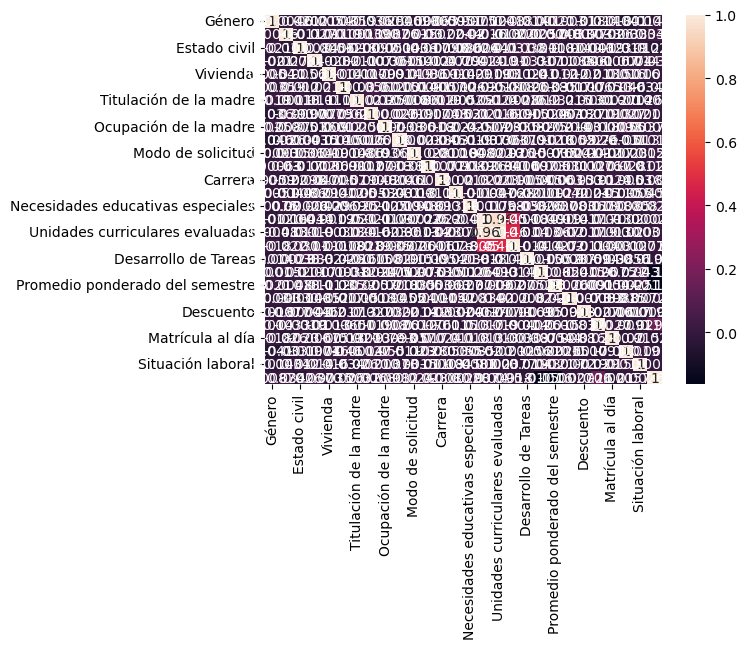

In [26]:
#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr, annot=True)

In [27]:
#Esto es para ver si hay variables categoricas
#categor_data.describe()

In [28]:
print('numeric_data.columns:',numeric_data.columns)
print('categor_data.columns:',categor_data.columns)

numeric_data.columns: Index(['Género', 'Edad', 'Estado civil', 'Procedencia', 'Vivienda',
       'Crianza Adventista', 'Titulación de la madre', 'Titulación del padre',
       'Ocupación de la madre', 'Ocupación del padre', 'Modo de solicitud',
       'Orden de solicitud', 'Carrera', 'Trasladado(a)',
       'Necesidades educativas especiales',
       'Unidades curriculares matriculadas', 'Unidades curriculares evaluadas',
       'Unidades curriculares aprobadas', 'Desarrollo de Tareas', 'Asistencia',
       'Promedio ponderado del semestre', 'Formas de Pago', 'Descuento',
       'Deudor', 'Matrícula al día', 'Becario', 'Situación laboral',
       'Condición Final'],
      dtype='object')
categor_data.columns: Index([], dtype='object')


### 🧹 5. Data transformation

In [29]:
data=df_clean

In [30]:
# 1. Codificar variable objetivo (Condición Final) en binaria
# 1 = Graduado -> 0
# 2 = Desertó  -> 1
data['target_deserto'] = data['Condición Final'].map({1: 0, 2: 1})

print(data[['Condición Final', 'target_deserto']].head())
print(data['target_deserto'].value_counts())

data

   Condición Final  target_deserto
0                1               0
1                2               1
2                1               0
3                1               0
4                2               1
target_deserto
0    1599
1    1401
Name: count, dtype: int64


,Género,Edad,Estado civil,Procedencia,Vivienda,Crianza Adventista,Titulación de la madre,Titulación del padre,Ocupación de la madre,Ocupación del padre,...,Asistencia,Promedio ponderado del semestre,Formas de Pago,Descuento,Deudor,Matrícula al día,Becario,Situación laboral,Condición Final,target_deserto
0,1,24,1,2,1,0,3,3,1,9,...,79,10.58,2,1,1,1,0,0,1,0
1,0,37,1,1,3,1,4,5,3,1,...,84,10.16,2,1,0,0,0,1,2,1
2,1,28,1,1,2,1,3,5,9,1,...,70,12.26,3,0,0,1,1,1,1,0
3,1,25,1,2,2,0,3,2,1,2,...,81,16.48,2,0,0,1,0,0,1,0
4,0,31,1,2,1,1,2,1,5,5,...,96,12.89,2,0,1,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,23,1,2,2,1,4,3,9,7,...,59,9.33,2,0,0,1,0,0,1,0
2996,1,35,2,1,3,1,2,5,9,4,...,75,13.14,1,0,0,1,1,1,1,0
2997,1,23,1,2,1,0,2,3,3,4,...,96,13.44,2,0,0,1,0,1,1,0
2998,1,22,1,2,1,1,3,3,5,8,...,49,11.12,1,0,0,1,0,0,1,0


In [31]:
# 2. One-Hot Encoding a las variables categóricas
categorical_cols = [
    "Género", "Estado civil", "Procedencia", "Vivienda", "Crianza Adventista",
    "Titulación de la madre", "Titulación del padre", "Ocupación de la madre", "Ocupación del padre",
    "Modo de solicitud", "Orden de solicitud", "Carrera", "Trasladado(a)", "Necesidades educativas especiales",
    "Formas de Pago", "Descuento", "Deudor", "Matrícula al día", "Becario", "Situación laboral"
]

# Aplicar One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print("Forma original:", data.shape)
print("Forma con One-Hot Encoding:", data_encoded.shape)
data_encoded.head()

Forma original: (3000, 29)
Forma con One-Hot Encoding: (3000, 93)


,Edad,Unidades curriculares matriculadas,Unidades curriculares evaluadas,Unidades curriculares aprobadas,Desarrollo de Tareas,Asistencia,Promedio ponderado del semestre,Condición Final,target_deserto,Género_1,...,Descuento_1,Descuento_2,Descuento_3,Descuento_4,Descuento_5,Deudor_1,Matrícula al día_1,Becario_1,Situación laboral_1,Situación laboral_2
0,24,8,7,5,41,79,10.58,1,0,True,...,True,False,False,False,False,True,True,False,False,False
1,37,7,6,4,45,84,10.16,2,1,False,...,True,False,False,False,False,False,False,False,True,False
2,28,4,4,0,96,70,12.26,1,0,True,...,False,False,False,False,False,False,True,True,True,False
3,25,7,7,4,65,81,16.48,1,0,True,...,False,False,False,False,False,False,True,False,False,False
4,31,4,3,0,69,96,12.89,2,1,False,...,False,False,False,False,False,True,True,False,False,False


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Escalar la variable Edad
data_encoded['Edad_scaled'] = scaler.fit_transform(data_encoded[['Edad']])

data_encoded[['Edad', 'Edad_scaled']].head()

,Edad,Edad_scaled
0,24,-0.511475
1,37,1.374102
2,28,0.068703
3,25,-0.366431
4,31,0.503836


In [33]:
# Seleccionar columnas transformadas relevantes
cols_show = ['target_deserto', 'Edad_scaled'] + \
            [col for col in data_encoded.columns if 
             col.startswith('Carrera_') or col.startswith('Género_') or col.startswith('Modo de solicitud_')]

data_encoded[cols_show].head()

,target_deserto,Edad_scaled,Género_1,Modo de solicitud_2,Modo de solicitud_3,Modo de solicitud_4,Modo de solicitud_5,Modo de solicitud_6,Carrera_2,Carrera_3,...,Carrera_22,Carrera_23,Carrera_24,Carrera_25,Carrera_26,Carrera_27,Carrera_28,Carrera_29,Carrera_30,Carrera_31
0,0,-0.511475,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,1,1.374102,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0,0.068703,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,-0.366431,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,0.503836,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
# Seleccionar predictores y target original
features_keep = [
    "Género", "Edad", "Estado civil", "Procedencia", "Vivienda", "Crianza Adventista",
    "Titulación de la madre", "Titulación del padre", "Ocupación de la madre", "Ocupación del padre",
    "Modo de solicitud", "Orden de solicitud", "Carrera", "Trasladado(a)", "Necesidades educativas especiales",
    "Unidades curriculares matriculadas", "Unidades curriculares evaluadas", "Unidades curriculares aprobadas",
    "Desarrollo de Tareas", "Asistencia", "Promedio ponderado del semestre",
    "Formas de Pago", "Descuento", "Deudor", "Matrícula al día", "Becario", "Situación laboral"
]

target = ["Condición Final"]

print("features_keep:", features_keep)
print("target:", target)

data = df_clean[features_keep + target].copy()
data.head()

features_keep: ['Género', 'Edad', 'Estado civil', 'Procedencia', 'Vivienda', 'Crianza Adventista', 'Titulación de la madre', 'Titulación del padre', 'Ocupación de la madre', 'Ocupación del padre', 'Modo de solicitud', 'Orden de solicitud', 'Carrera', 'Trasladado(a)', 'Necesidades educativas especiales', 'Unidades curriculares matriculadas', 'Unidades curriculares evaluadas', 'Unidades curriculares aprobadas', 'Desarrollo de Tareas', 'Asistencia', 'Promedio ponderado del semestre', 'Formas de Pago', 'Descuento', 'Deudor', 'Matrícula al día', 'Becario', 'Situación laboral']
target: ['Condición Final']


,Género,Edad,Estado civil,Procedencia,Vivienda,Crianza Adventista,Titulación de la madre,Titulación del padre,Ocupación de la madre,Ocupación del padre,...,Desarrollo de Tareas,Asistencia,Promedio ponderado del semestre,Formas de Pago,Descuento,Deudor,Matrícula al día,Becario,Situación laboral,Condición Final
0,1,24,1,2,1,0,3,3,1,9,...,41,79,10.58,2,1,1,1,0,0,1
1,0,37,1,1,3,1,4,5,3,1,...,45,84,10.16,2,1,0,0,0,1,2
2,1,28,1,1,2,1,3,5,9,1,...,96,70,12.26,3,0,0,1,1,1,1
3,1,25,1,2,2,0,3,2,1,2,...,65,81,16.48,2,0,0,1,0,0,1
4,0,31,1,2,1,1,2,1,5,5,...,69,96,12.89,2,0,1,1,0,0,2


#### 🔧 Codificación y transformación de variables

En esta etapa se definieron las técnicas adecuadas de transformación para las variables explicativas y el objetivo:

##### 1. Variable objetivo: `Condición Final`
- **valores originales**:  
  - `Graduado = 1`  
  - `Desertó = 2`  
- Se aplicó **codificación binaria**:  
  - `Graduado = 0`  
  - `Desertó = 1`  
- El problema es de clasificación binaria (deserta o no deserta). Representarlo como 0/1 es la forma más directa y eficiente para los algoritmos de machine learning.

---

##### 2. Variables categóricas:
- **Sociodemográficas**: Género, Estado civil, Procedencia, Vivienda, Crianza Adventista.
- **Familiares**: Titulación de la madre, Titulación del padre, Ocupación de la madre, Ocupación del padre
- **Académicas de ingreso**: Modo de solicitud, Orden de solicitud, Carrera, Trasladado(a), Necesidades educativas especiales
- **Económicas**: Formas de Pago, Descuento, Deudor, Matrícula al día, Becario, Situación laboral

- Transformación aplicada
  - Se utilizó One-Hot Encoding, generando columnas binarias (0/1) para cada categoría.
  - Se aplicó drop_first=True para evitar multicolinealidad.
- Justificación 
  - Estas variables son nominales, no existe un orden natural entre sus categorías. 
  - **Label Encoding** introduciría un orden artificial que puede sesgar los modelos lineales.  
  - **Ordinal Encoding** no aplica porque no existe jerarquía natural entre tipos de vehículo o combustible.  

---

##### 3. Variable numérica:
- **Variables incluidas**: Edad, Desarrollo de Tareas, Asistencia, Promedio ponderado del semestre, Unidades curriculares matriculadas, Unidades curriculares evaluadas, Unidades curriculares aprobadas

- Transformación aplicada
 - Se mantuvieron las variables originales.
 - Se aplicó escalado con StandardScaler a algunas de ellas (ejemplo: Edad_scaled).

- Justificación:  
  - Algoritmos como Regresión Logística, SVM y Redes Neuronales se benefician del escalado (mejora la convergencia y el rendimiento). 
  - En modelos basados en árboles (Decision Tree, Random Forest, Gradient Boosting) no es estrictamente necesario, pero tampoco afecta negativamente.  
  - Conservar tanto la versión original como la escalada otorga flexibilidad en la fase de modelado.

---

##### 📌 Conclusión
- **`Variable objetivo (Condición Final)` → transformada a binaria (target_deserto: 0 = graduado, 1 = desertó).**  
- **`Variables categóricas` → codificadas con One-Hot Encoding.**  
- **`Variables numéricas` → mantenidas en su forma original y escaladas.**

De esta manera, el dataset queda completamente preparado para alimentar modelos de Machine Learning, evitando sesgos por codificación inapropiada y garantizando consistencia entre variables de distinta naturaleza.



In [35]:
# 6. Calcular correlaciones con la variable objetivo (target_deserto)
corr_vars = data_encoded.corr()

# Mostrar las correlaciones ordenadas con respecto al target
corr_with_target = corr_vars['target_deserto'].sort_values(ascending=False)

print("Correlaciones con la variable objetivo (target_deserto):")
display(corr_with_target)



Correlaciones con la variable objetivo (target_deserto):


Condición Final                    1.000000
target_deserto                     1.000000
Deudor_1                           0.159944
Carrera_25                         0.035526
Carrera_19                         0.034615
                                     ...   
Estado civil_2                    -0.025834
Crianza Adventista_1              -0.026495
Carrera_13                        -0.031450
Asistencia                        -0.145863
Promedio ponderado del semestre   -0.163493
Name: target_deserto, Length: 94, dtype: float64

In [36]:
# Ordenar las correlaciones con respecto a la variable objetivo (target_deserto)
corr_with_target = corr_vars['target_deserto'].sort_values(ascending=False)

print("Correlaciones ordenadas con la variable objetivo:")
display(corr_with_target)

Correlaciones ordenadas con la variable objetivo:


Condición Final                    1.000000
target_deserto                     1.000000
Deudor_1                           0.159944
Carrera_25                         0.035526
Carrera_19                         0.034615
                                     ...   
Estado civil_2                    -0.025834
Crianza Adventista_1              -0.026495
Carrera_13                        -0.031450
Asistencia                        -0.145863
Promedio ponderado del semestre   -0.163493
Name: target_deserto, Length: 94, dtype: float64

#### 📊 Interpretación de correlaciones

##### 1. Variables con correlación positiva (mayor probabilidad de deserción)
- **`Deudor_1` (r ≈ +0.16)** Ser deudor es la variable con mayor asociación positiva a la deserción. Los estudiantes con deudas tienen más probabilidad de abandonar.  
- **`Carrera_25 – Enfermería` (r ≈ +0.036):** Ligera correlación positiva: en esta carrera se observa una leve tendencia mayor a desertar.  
- **`Carrera_19 – Ingeniería de Ciberseguridad` (r ≈ +0.035)** También presenta una correlación positiva con la deserción.
- Otras carreras específicas aparecen con correlaciones positivas, aunque muy bajas (< +0.03), lo que indica un efecto marginal.

---

##### 2. Variables con correlación negativa (menor probabilidad de deserción)
- **`Promedio ponderado del semestre` (r ≈ –0.16):** Es la variable más relevante: a mayor promedio académico, menor probabilidad de desertar. 
- **`Asistencia` (r ≈ –0.15):** Este tipo de vehículo se asocia a más desaprobación.  
- **`Carrera_13 – Educación Matemática y Computación` (r ≈ –0.03):** Presenta una ligera asociación con menor deserción.
- **`Crianza Adventista_1` (r ≈ –0.026):** Tendencia leve: los estudiantes con crianza adventista desertan menos.
- **`Estado civil_2 – Casado` (r ≈ –0.026):** Ligera correlación negativa, los casados desertan menos en comparación con solteros.
  
---

##### 3. Variables neutras o con efecto muy bajo
- La mayoría de las variables dummy de carrera, procedencia, formas de pago, becario, etc., presentan correlaciones cercanas a 0, lo que indica que su efecto aislado sobre la deserción es muy bajo o prácticamente nulo.

---

##### 📌 Conclusiones
- **Factores académicos (Promedio ponderado del semestre y Asistencia)**  son los principales predictores: buen rendimiento y asistencia reducen significativamente el riesgo de deserción.
- **Factores económicos (Deudor)** incrementan la probabilidad de desertar: confirma la importancia del aspecto financiero en la permanencia estudiantil. 
- **Algunas carreras específicas** muestran ligeras tendencias (Enfermería y Ciberseguridad con mayor deserción; Educación Matemática con menor), aunque los efectos son débiles.
- **Factores sociodemográficos como Estado civil y Crianza Adventistas** parecen tener un efecto marginal en sentido protector contra la deserción.

👉 Esto confirma que **modelo debe enfocarse en las variables académicas y económicas** , ya que son las más fuertemente asociadas con la deserción, mientras que el resto pueden aportar valor agregado pero con efectos más débiles.



/tmp/ipykernel_2743/2446773015.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target_plot.values[:15],


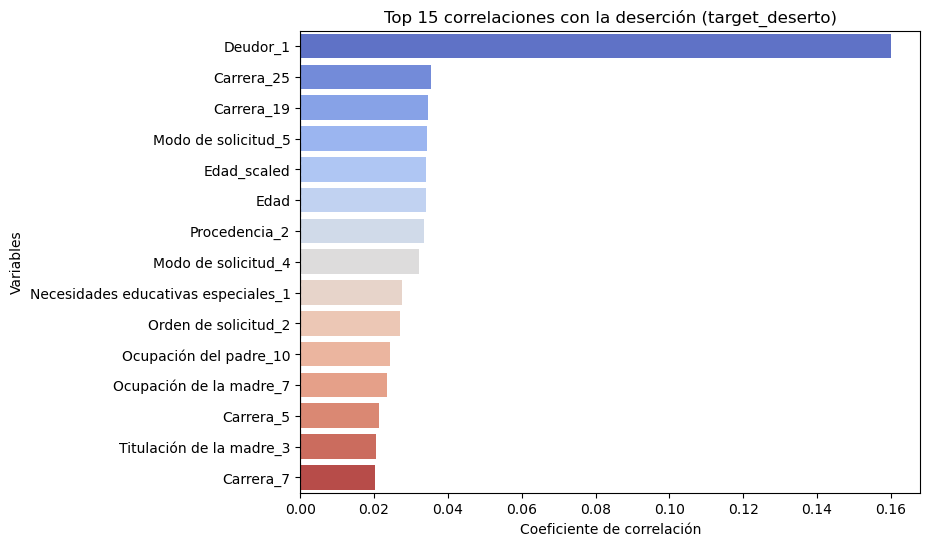

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Excluir autocorrelación con el target
corr_with_target_plot = corr_with_target.drop(['target_deserto', 'Condición Final'])

# Crear gráfico de barras ordenado (Top 15 variables más correlacionadas)
plt.figure(figsize=(8,6))
sns.barplot(x=corr_with_target_plot.values[:15], 
            y=corr_with_target_plot.index[:15], 
            palette="coolwarm")
plt.title("Top 15 correlaciones con la deserción (target_deserto)")
plt.xlabel("Coeficiente de correlación")
plt.ylabel("Variables")
plt.axvline(0, color='black', linestyle='--')
plt.show()


In [38]:
# fin del cuaderno ----*-----

#### Otras posibles transformaciones
##### 1. Agrupación de variables numéricas en rangos (binning): 
- Edad: en lugar de usar la edad exacta, podrías crear grupos: <20 años, 20–24, 25–29, ≥30.
- Promedio ponderado del semestre: agrupar en categorías: Bajo (<11), Medio (11–15), Alto (>15)
- Asistencia: convertir en categorías: Baja (<70%), Media (70–90%), Alta (>90%).
👉 Esto ayuda a simplificar patrones no lineales y a hacer interpretaciones más fáciles.

##### 2. Variables binarias derivadas:
- ¿Es mayor de 30 años? (sí/no).
- ¿Tiene beca? (Becario).
- ¿Es deudor? (Deudor).
- ¿Vive en residencia universitaria? (Vivienda==1).
👉 Esto convierte información en indicadores más claros y fáciles de interpretar.

##### 3. Indicadores académicos compuestos:
- Tasa de aprobación = Unidades curriculares aprobadas / evaluadas.
- Carga académica efectiva = Evaluadas / Matriculadas.
- Eficiencia académica = combinación de asistencia + tareas + promedio ponderado.
👉 Estos nuevos indicadores pueden capturar mejor el rendimiento real del estudiante.

#### Reduccion.
Una vez hechas las transformaciones, puedes reducir el dataset para evitar redundancia y ruido:

##### 1. Eliminar variables muy correlacionadas entre sí 
- Ejemplo: Unidades matriculadas, Unidades evaluadas, Unidades aprobadas pueden condensarse en tasa de aprobación.

##### 2. Eliminar variables con baja correlación o baja importancia
- Si al calcular correlaciones o importancia de features (con árboles, por ejemplo), una variable aporta casi nada, se puede descartar.

##### 3. Seleccionar las más relevantes para el modelo
- Académicas (promedio, asistencia, tasa de aprobación).
- Económicas (deudor, beca, formas de pago).
- Sociodemográficas clave (edad, procedencia).

In [39]:
data

,Género,Edad,Estado civil,Procedencia,Vivienda,Crianza Adventista,Titulación de la madre,Titulación del padre,Ocupación de la madre,Ocupación del padre,...,Desarrollo de Tareas,Asistencia,Promedio ponderado del semestre,Formas de Pago,Descuento,Deudor,Matrícula al día,Becario,Situación laboral,Condición Final
0,1,24,1,2,1,0,3,3,1,9,...,41,79,10.58,2,1,1,1,0,0,1
1,0,37,1,1,3,1,4,5,3,1,...,45,84,10.16,2,1,0,0,0,1,2
2,1,28,1,1,2,1,3,5,9,1,...,96,70,12.26,3,0,0,1,1,1,1
3,1,25,1,2,2,0,3,2,1,2,...,65,81,16.48,2,0,0,1,0,0,1
4,0,31,1,2,1,1,2,1,5,5,...,69,96,12.89,2,0,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,23,1,2,2,1,4,3,9,7,...,61,59,9.33,2,0,0,1,0,0,1
2996,1,35,2,1,3,1,2,5,9,4,...,62,75,13.14,1,0,0,1,1,1,1
2997,1,23,1,2,1,0,2,3,3,4,...,68,96,13.44,2,0,0,1,0,1,1
2998,1,22,1,2,1,1,3,3,5,8,...,42,49,11.12,1,0,0,1,0,0,1


In [40]:
# Frecuencias categóricas: Carrera
freq_carrera = data['Carrera'].value_counts(normalize=True) * 100
freq_carrera.to_frame("percentage").head(10)  # Top 10 carreras

#Otros ejemplos que pueden servir
#Para modo de solicitud
#freq_modo = data['Modo de solicitud'].value_counts(normalize=True) * 100
#freq_modo.to_frame("percentage")

#Para Género
#freq_genero = data['Género'].value_counts(normalize=True) * 100
#freq_genero.to_frame("percentage")

#Para Becario
#freq_becario = data['Becario'].value_counts(normalize=True) * 100
#freq_becario.to_frame("percentage")


,percentage
Carrera,
7,3.800000
24,3.766667
20,3.733333
14,3.700000
9,3.566667
16,3.533333
15,3.533333
8,3.433333
11,3.433333


In [41]:
# Frecuencias categóricas: Modo de solicitud
freq_modo = data['Modo de solicitud'].value_counts(normalize=True) * 100
freq_modo.to_frame("percentage")

#Otros ejemplo útiles
#Procedencia
#freq_proc = data['Procedencia'].value_counts(normalize=True) * 100
#freq_proc.to_frame("percentage")

#Para vivienda
#freq_vivienda = data['Vivienda'].value_counts(normalize=True) * 100
#freq_vivienda.to_frame("percentage")

#Para Becario
#freq_becario = data['Becario'].value_counts(normalize=True) * 100
#freq_becario.to_frame("percentage")

,percentage
Modo de solicitud,
6,17.733333
2,17.366667
5,16.833333
1,16.566667
3,15.833333
4,15.666667


In [42]:
# Guardar dataset limpio (sin transformaciones adicionales)
data.to_csv("upeu_data_clean.csv", index=False)
print("✅ Dataset limpio guardado como upeu_data_clean.csv")

# Guardar dataset ya transformado (One-Hot Encoding, escalado, etc.)
data_encoded.to_csv("upeu_data_encoded.csv", index=False)
print("✅ Dataset transformado guardado como upeu_data_encoded.csv")


✅ Dataset limpio guardado como upeu_data_clean.csv
✅ Dataset transformado guardado como upeu_data_encoded.csv


### ✅  6. Data validation (Sesión 4)

Aquí buscamos quedarnos con las variables más útiles, eliminando redundantes o irrelevantes, para que el modelo sea eficiente y evite ruido.

In [43]:
# Cargar dataset limpio
df = pd.read_csv("upeu_data_clean.csv")
print("Forma del dataset limpio:", df.shape)
df.head()


Forma del dataset limpio: (3000, 28)


,Género,Edad,Estado civil,Procedencia,Vivienda,Crianza Adventista,Titulación de la madre,Titulación del padre,Ocupación de la madre,Ocupación del padre,...,Desarrollo de Tareas,Asistencia,Promedio ponderado del semestre,Formas de Pago,Descuento,Deudor,Matrícula al día,Becario,Situación laboral,Condición Final
0,1,24,1,2,1,0,3,3,1,9,...,41,79,10.58,2,1,1,1,0,0,1
1,0,37,1,1,3,1,4,5,3,1,...,45,84,10.16,2,1,0,0,0,1,2
2,1,28,1,1,2,1,3,5,9,1,...,96,70,12.26,3,0,0,1,1,1,1
3,1,25,1,2,2,0,3,2,1,2,...,65,81,16.48,2,0,0,1,0,0,1
4,0,31,1,2,1,1,2,1,5,5,...,69,96,12.89,2,0,1,1,0,0,2


In [44]:
# Cargar dataset transformado
df_encoded = pd.read_csv("upeu_data_encoded.csv")
print("Forma del dataset transformado:", df_encoded.shape)
df_encoded.head()


Forma del dataset transformado: (3000, 94)


,Edad,Unidades curriculares matriculadas,Unidades curriculares evaluadas,Unidades curriculares aprobadas,Desarrollo de Tareas,Asistencia,Promedio ponderado del semestre,Condición Final,target_deserto,Género_1,...,Descuento_2,Descuento_3,Descuento_4,Descuento_5,Deudor_1,Matrícula al día_1,Becario_1,Situación laboral_1,Situación laboral_2,Edad_scaled
0,24,8,7,5,41,79,10.58,1,0,True,...,False,False,False,False,True,True,False,False,False,-0.511475
1,37,7,6,4,45,84,10.16,2,1,False,...,False,False,False,False,False,False,False,True,False,1.374102
2,28,4,4,0,96,70,12.26,1,0,True,...,False,False,False,False,False,True,True,True,False,0.068703
3,25,7,7,4,65,81,16.48,1,0,True,...,False,False,False,False,False,True,False,False,False,-0.366431
4,31,4,3,0,69,96,12.89,2,1,False,...,False,False,False,False,True,True,False,False,False,0.503836


In [45]:
# Seleccionar columnas relevantes para mostrar
cols_show = ['target_deserto', 'Edad_scaled'] + \
            [col for col in data_encoded.columns if col.startswith('Carrera_') or 
                                                   col.startswith('Género_') or 
                                                   col.startswith('Modo de solicitud_') or
                                                   col.startswith('Estado civil_')]

data_encoded[cols_show].head()


,target_deserto,Edad_scaled,Género_1,Estado civil_2,Modo de solicitud_2,Modo de solicitud_3,Modo de solicitud_4,Modo de solicitud_5,Modo de solicitud_6,Carrera_2,...,Carrera_22,Carrera_23,Carrera_24,Carrera_25,Carrera_26,Carrera_27,Carrera_28,Carrera_29,Carrera_30,Carrera_31
0,0,-0.511475,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,1,1.374102,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0,0.068703,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,-0.366431,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,0.503836,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


/tmp/ipykernel_2743/1482182932.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette="coolwarm")


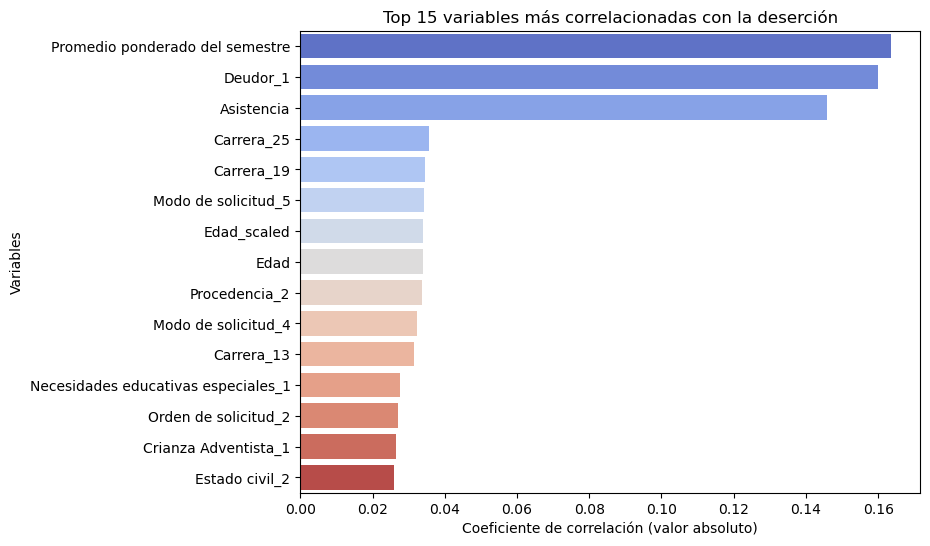

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular correlación solo en las columnas seleccionadas
#corr = data_encoded[cols_show].corr()

#plt.figure(figsize=(12,8))
#sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
#plt.title("Matriz de correlación post-limpieza (variables seleccionadas)", fontsize=14)
#plt.show()

#################################################################################################
# Correlación de todas las variables con el target
#corr_target = data_encoded.corr()['target_deserto'].drop(['target_deserto','Condición Final']).sort_values(ascending=False)

#plt.figure(figsize=(8,10))
#sns.barplot(x=corr_target.values, y=corr_target.index, palette="coolwarm")
#plt.title("Correlación de variables con la deserción (target_deserto)")
#plt.xlabel("Coeficiente de correlación")
#plt.ylabel("Variables")
#plt.axvline(0, color='black', linestyle='--')
#plt.show()

################################################################################################
#Correlación con el filtro de las top 15
top_corr = corr_target.abs().sort_values(ascending=False).head(15)

plt.figure(figsize=(8,6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette="coolwarm")
plt.title("Top 15 variables más correlacionadas con la deserción")
plt.xlabel("Coeficiente de correlación (valor absoluto)")
plt.ylabel("Variables")
plt.show()



In [49]:
# Ordenar correlaciones respecto a la variable objetivo (target_deserto)
corr_target_sorted = corr["target_deserto"].sort_values(ascending=False)

print("Correlaciones con target_deserto:")
display(corr_target_sorted)



Correlaciones con target_deserto:


target_deserto         1.000000
Carrera_25             0.035526
Carrera_19             0.034615
Modo de solicitud_5    0.034222
Edad_scaled            0.033976
Modo de solicitud_4    0.032185
Carrera_5              0.021410
Carrera_7              0.020135
Carrera_17             0.019371
Carrera_12             0.017902
Carrera_10             0.014198
Carrera_22             0.013758
Carrera_16             0.012659
Carrera_18             0.011765
Carrera_24             0.011331
Género_1               0.008710
Carrera_2              0.005036
Carrera_11             0.003299
Modo de solicitud_3    0.000320
Carrera_8             -0.000371
Modo de solicitud_2   -0.000541
Carrera_31            -0.000923
Carrera_20            -0.001071
Carrera_21            -0.002879
Carrera_28            -0.005516
Carrera_23            -0.008656
Carrera_29            -0.008684
Carrera_14            -0.010042
Carrera_6             -0.011867
Carrera_30            -0.013623
Carrera_27            -0.015321
Carrera_

#####  Selección final de variables

In [51]:
TARGET = "target_deserto"

# 1) Columnas candidatas: todas menos el target y la etiqueta original
candidates = [c for c in data_encoded.columns if c not in [TARGET, "Condición Final"]]

# 2) Correlación (absoluta) de cada feature con el target
corr_with_target = data_encoded[candidates + [TARGET]].corr()[TARGET].drop(TARGET).abs()

# --- Parámetros de selección ---
# Umbral mínimo de correlación con el target (ajústalo si lo deseas)
MIN_ABS_CORR = 0.02  # 0.02 ~ 2% de efecto lineal; antes de modelado suele ser un buen filtro inicial
# Número máximo de features por si prefieres top-k además del umbral (opcional)
TOP_K = None  # por ejemplo 30; déjalo en None para usar solo el umbral

# 3) Seleccionar por umbral (y opcionalmente por top-k)
selected_by_corr = corr_with_target[corr_with_target >= MIN_ABS_CORR].sort_values(ascending=False)
if TOP_K is not None and len(selected_by_corr) > TOP_K:
    selected_by_corr = selected_by_corr.head(TOP_K)

selected_features = selected_by_corr.index.tolist()

print("▶ Features seleccionadas por correlación (>= {:.3f}): {}"
      .format(MIN_ABS_CORR, len(selected_features)))
print(selected_by_corr)

# 4) (Opcional pero recomendado) eliminar colinealidad alta entre seleccionadas
#    Regla simple: si |corr| > 0.90, nos quedamos con la que tenga mayor correlación con el target.
if len(selected_features) > 1:
    corr_mat = data_encoded[selected_features].corr().abs()
    # Acabamos con una estrategia greedy
    to_drop_highcorr = set()
    # Ordenar por importancia (corr con target) para preservar las más útiles
    ordered = selected_by_corr.index.tolist()
    kept = []
    for feat in ordered:
        if feat in to_drop_highcorr:
            continue
        kept.append(feat)
        # Marcar para eliminar otras muy colineales con 'feat'
        highly_corr = corr_mat.index[(corr_mat[feat] > 0.90) & (corr_mat.index != feat)].tolist()
        for hc in highly_corr:
            to_drop_highcorr.add(hc)

    final_features = [f for f in kept if f not in to_drop_highcorr]
else:
    final_features = selected_features

print("\n❌ Eliminadas por colinealidad (>0.90):", sorted(list(set(selected_features) - set(final_features))))
print("✅ Features finales:", len(final_features))

# 5) Construir el dataset final para modelar
df_final = data_encoded[final_features + [TARGET]].copy()
print("Dimensiones finales:", df_final.shape)

# Vista rápida
df_final.head()

▶ Features seleccionadas por correlación (>= 0.020): 27
Promedio ponderado del semestre        0.163493
Deudor_1                               0.159944
Asistencia                             0.145863
Carrera_25                             0.035526
Carrera_19                             0.034615
Modo de solicitud_5                    0.034222
Edad_scaled                            0.033976
Edad                                   0.033976
Procedencia_2                          0.033647
Modo de solicitud_4                    0.032185
Carrera_13                             0.031450
Necesidades educativas especiales_1    0.027662
Orden de solicitud_2                   0.026955
Crianza Adventista_1                   0.026495
Estado civil_2                         0.025834
Ocupación del padre_10                 0.024200
Ocupación de la madre_7                0.023595
Modo de solicitud_6                    0.023517
Ocupación del padre_6                  0.022189
Matrícula al día_1              

,Promedio ponderado del semestre,Deudor_1,Asistencia,Carrera_25,Carrera_19,Modo de solicitud_5,Edad_scaled,Procedencia_2,Modo de solicitud_4,Carrera_13,...,Ocupación del padre_6,Matrícula al día_1,Carrera_5,Ocupación del padre_5,Ocupación del padre_3,Titulación de la madre_3,Titulación de la madre_2,Carrera_7,Carrera_3,target_deserto
0,10.58,True,79,False,False,False,-0.511475,True,True,False,...,False,True,False,False,False,True,False,False,False,0
1,10.16,False,84,False,False,False,1.374102,False,False,False,...,False,False,False,False,False,False,False,False,False,1
2,12.26,False,70,False,False,False,0.068703,False,False,False,...,False,True,False,False,False,True,False,False,False,0
3,16.48,False,81,False,False,False,-0.366431,True,True,False,...,False,True,False,False,False,True,False,False,False,0
4,12.89,True,96,False,False,False,0.503836,True,False,False,...,False,True,False,True,False,False,True,False,False,1


In [52]:
df_final

,Promedio ponderado del semestre,Deudor_1,Asistencia,Carrera_25,Carrera_19,Modo de solicitud_5,Edad_scaled,Procedencia_2,Modo de solicitud_4,Carrera_13,...,Ocupación del padre_6,Matrícula al día_1,Carrera_5,Ocupación del padre_5,Ocupación del padre_3,Titulación de la madre_3,Titulación de la madre_2,Carrera_7,Carrera_3,target_deserto
0,10.58,True,79,False,False,False,-0.511475,True,True,False,...,False,True,False,False,False,True,False,False,False,0
1,10.16,False,84,False,False,False,1.374102,False,False,False,...,False,False,False,False,False,False,False,False,False,1
2,12.26,False,70,False,False,False,0.068703,False,False,False,...,False,True,False,False,False,True,False,False,False,0
3,16.48,False,81,False,False,False,-0.366431,True,True,False,...,False,True,False,False,False,True,False,False,False,0
4,12.89,True,96,False,False,False,0.503836,True,False,False,...,False,True,False,True,False,False,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,9.33,False,59,False,False,True,-0.656519,True,False,False,...,False,True,False,False,False,False,False,False,False,0
2996,13.14,False,75,False,False,False,1.084014,False,False,False,...,False,True,False,False,False,False,True,False,False,0
2997,13.44,False,96,False,False,False,-0.656519,True,False,False,...,False,True,False,False,False,False,True,False,False,0
2998,11.12,False,49,False,False,False,-0.801564,True,False,False,...,False,True,False,False,False,True,False,False,False,0


In [53]:
# Guardar dataset final listo para modelado
df_final.to_csv("upeu_data_encoded_final.csv", index=False)
print("✅ Dataset final guardado como upeu_data_encoded_final.csv")


✅ Dataset final guardado como upeu_data_encoded_final.csv


### Guía autónoma de la sesión 4

cada equipo aplica exactamente el mismo flujo a su dataset del proyecto grupal.

#### 📦 Entregables Sesión 4
1. Este notebook o cuaderno .ipynb pero con tus datos.
2. Dataset limpio + transformado en .csv.
3. Github:https://github.com/mindatos/respiralimpio (reemplaza aquí por tu url)
4. Coloca aquí el resumen de decisiones.
